# Risque de cancer du col de l'utérus

>> **Vous trouvez les données et leur description :**<br>
>> https://www.kaggle.com/abhia1999/chronic-kidney-disease<br>
>> https://archive.ics.uci.edu/ml/datasets/chronic_kidney_disease<br>

**UCI - global**
>> >> **age** - age<br>
>> >> **bp** - blood pressure<br>
>> >> **sg** - specific gravity<br>
>> >> **al** - albumin<br>
>> >> **su** - sugar<br>
>> >> **rbc** - red blood cells<br>
>> >> **pc** - pus cell<br>
>> >> **pcc** - pus cell clumps<br>
>> >> **ba** - bacteria<br>
>> >> **bgr** - blood glucose random<br>
>> >> **bu** - blood urea<br>
>> >> **sc** - serum creatinine<br>
>> >> **sod** - sodium<br>
>> >> **pot** - potassium<br>
>> >> **hemo** - hemoglobin<br>
>> >> **pcv** - packed cell volume<br>
>> >> **wc** - white blood cell count<br>
>> >> **rc** - red blood cell count<br>
>> >> **htn** - hypertension<br>
>> >> **dm** - diabetes mellitus<br>
>> >> **cad** - coronary artery disease<br>
>> >> **appet** - appetite<br>
>> >> **pe** - pedal edema<br>
>> >> **ane** - anemia<br>
>> >> **class** - class <br>

**kaggle**
>> >> **bp** - blood pressure<br>
>> >> **sg** - specific gravity<br>
>> >> **al** - albumin<br>
>> >> **su** - sugar<br>
>> >> **rbc** - red blood cells<br>
>> >> **bu** - blood urea<br>
>> >> **sc** - serum creatinine<br>
>> >> **sod** - sodium<br>
>> >> **pot** - potassium<br>
>> >> **hemo** - hemoglobin<br>
>> >> **wc** - white blood cell count<br>
>> >> **rc** - red blood cell count<br>
>> >> **htn** - hypertension<br>
>> >> **class** - class <br>


In [1]:
import numpy as np, pandas as pd, seaborn as sns  
from datetime import datetime as dt
import os, warnings, time
from matplotlib import pyplot as plt

if int(str(sns.__version__).split('.')[1]) > 8 : 
    plt.style.use('seaborn-v0_8-darkgrid')
else:
    plt.style.use('seaborn-darkgrid')
    
sns.set(font_scale=2)
warnings.filterwarnings(action="ignore")
seed = 123456789

# Librairies du projet

In [2]:
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import NuSVC, SVC, OneClassSVM
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import ConstantKernel, RBF, RationalQuadratic, ExpSineSquared, DotProduct, Matern, WhiteKernel

from sklearn.tree import DecisionTreeClassifier, export_graphviz, plot_tree
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB, ComplementNB
from lightgbm import LGBMClassifier
from xgboost  import XGBClassifier
from sklearn.metrics import roc_curve, auc

from sklearn.metrics  import make_scorer, confusion_matrix, roc_curve, auc, accuracy_score, log_loss, hamming_loss, \
                             precision_score, recall_score, f1_score, jaccard_score,  \
                             precision_recall_curve, average_precision_score

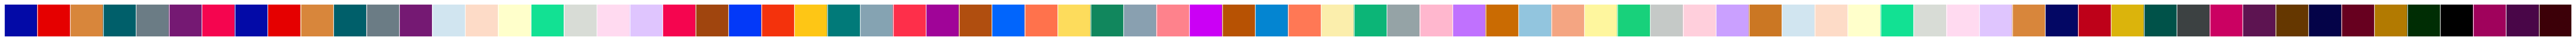

In [3]:
palette = [ "#030aa7", "#e50000", "#d8863b", "#005f6a", "#6b7c85", "#751973",
            "#f5054f", 
            "#030aa7", "#e50000", "#d8863b", "#005f6a", "#6b7c85", "#751973", "#d1e5f0", "#fddbc7",
            "#ffffcb", "#12e193", "#d8dcd6", "#ffdaf0", "#dfc5fe", "#f5054f", "#a0450e",
            "#0339f8", "#f4320c", "#fec615", "#017a79", "#85a3b2", "#fe2f4a", "#a00498", "#b04e0f",
            "#0165fc", "#ff724c", "#fddc5c", "#11875d", "#89a0b0", "#fe828c", "#cb00f5", "#b75203",
            "#0485d1", "#ff7855", "#fbeeac", "#0cb577", "#95a3a6", "#ffb7ce", "#c071fe", "#ca6b02",
            "#92c5de", "#f4a582", "#fef69e", "#18d17b", "#c5c9c7", "#ffcfdc", "#caa0ff", "#cb7723",
            "#d1e5f0", "#fddbc7", "#ffffcb", "#12e193", "#d8dcd6", "#ffdaf0", "#dfc5fe", "#d8863b",
            "#030764", "#be0119", "#dbb40c", "#005249", "#3c4142", "#cb0162", "#5d1451", "#653700",
            "#040348", "#67001f", "#b27a01", "#002d04", "#000000", "#a0025c", "#490648", "#3c0008"
          ]

paletteA = ['#b2182b','#008827','#053061','#ffa500', '#34495e', '#e74c3c', 
          '#9b59b6', '#0165fc','#2ecc71', '#cb7723', '#89a0b0']

sns.palplot(sns.color_palette(palette))

In [4]:
repertoireRacine  = '.'
nomProjet         = "Maladie rénale chronique"

repertoireProjet  = os.path.join(repertoireRacine, nomProjet)
repertoireDonnees = os.path.join(repertoireProjet, 'repertoire.donnees')
repertoireImages  = os.path.join(repertoireProjet, 'repertoire.images')


def controleExistenceRepertoire( repertoire, create_if_needed=True):
    """Voir si le répertoire existe. S'il n'existe pas il est créé."""
    path_exists = os.path.exists(repertoire)
    if path_exists:
        if not os.path.isdir(repertoire):
            raise Exception("Trouvé le nom  "+repertoire +" mais c'est un fichier, pas un répertoire")
            # return False
        return True
    if create_if_needed:
        os.makedirs(repertoire)

def sauvegarderImage( fichier):
    """Enregistrez la figure. Appelez la méthode juste avant plt.show ()."""
    controleExistenceRepertoire(repertoireImages)
    plt.savefig(os.path.join(repertoireImages,
                             fichier+f"--{dt.now().strftime('%Y_%m_%d_%H.%M.%S')}.png"), 
                             dpi=600, 
                             bbox_inches='tight')

def sauvegarderImageSNS( sns_plot, fichier):
    """Enregistrez la figure. Appelez la méthode juste avant plt.show ()."""
    controleExistenceRepertoire(repertoireImages)
    fig = sns_plot.get_figure()
    fig.savefig(os.path.join(repertoireImages,fichier+'.png'))
    
controleExistenceRepertoire(repertoireProjet);
controleExistenceRepertoire(repertoireDonnees);
controleExistenceRepertoire(repertoireImages);

def afficheDistribution(colonne, cible):
        plt.figure(figsize=(14,12))
        sns.distplot(colonne[
                           cible == 1],
                       color="steelblue")
        sns.distplot(colonne[
                           cible == 0],
                       color="red")
        axline((colonne.median(), 0), (colonne.median(), 1), linewidth=1, color='r', linestyle='--')
        sauvegarderImage("La distribution des colonnes")    
        plt.show()
        
def createColumnsQualitatives(donnees,col):
    valeurs = donnees[col].sort_values().unique()
    for i in valeurs : 
        nom = col+'_'+str(i)
        donnees[nom] = donnees[col].apply(lambda x : 1 if x==i else 0)
    donnees.drop(labels=col, axis=1, inplace=True)   

def replaceNa_0(colonne, donnees, atype):
    donnees.loc[donnees[colonne].isna(),colonne] = 0
    donnees[colonne] = donnees[colonne].astype(atype)    

# Lecture de l'échantillon initial


<img src="https://raw.githubusercontent.com/rbizoi/IntelligenceEnDonneesDeSante/main/images/EchantillonInitial.png" width="800">

In [5]:
!pwd

/home/razvan/documentation/IntelligenceEnDonneesDeSante/Classifications


In [6]:
donnees = pd.read_csv('../donnees/Chronic kidney disease/new_model.csv')
donnees.columns = ['blood pressure',
                   'specific gravity',
                   'albumin',
                   'sugar',
                   'red blood cells',
                   'blood urea',
                   'serum creatinine',
                   'sodium',
                   'potassium',
                   'hemoglobin',
                   'white blood cell count',
                   'red blood cell count',
                   'hypertension',
                   'cible']
donnees.head()

,blood pressure,specific gravity,albumin,sugar,red blood cells,blood urea,serum creatinine,sodium,potassium,hemoglobin,white blood cell count,red blood cell count,hypertension,cible
0,80.0,1.020,1.0,0.0,1.0,36.0,1.2,137.53,4.63,15.4,7800.0,5.20,1.0,1
1,50.0,1.020,4.0,0.0,1.0,18.0,0.8,137.53,4.63,11.3,6000.0,4.71,0.0,1
2,80.0,1.010,2.0,3.0,1.0,53.0,1.8,137.53,4.63,9.6,7500.0,4.71,0.0,1
3,70.0,1.005,4.0,0.0,1.0,56.0,3.8,111.00,2.50,11.2,6700.0,3.90,1.0,1
4,80.0,1.010,2.0,0.0,1.0,26.0,1.4,137.53,4.63,11.6,7300.0,4.60,0.0,1


In [7]:
for col in donnees.columns:
    print(col,'\n\t',donnees[col].sort_values().unique())

blood pressure 
	 [ 50.  60.  70.  76.  80.  90. 100. 110. 120. 140. 180.]
specific gravity 
	 [1.005 1.01  1.015 1.02  1.025]
albumin 
	 [0. 1. 2. 3. 4. 5.]
sugar 
	 [0. 1. 2. 3. 4. 5.]
red blood cells 
	 [0. 1.]
blood urea 
	 [  1.5  10.   15.   16.   17.   18.   19.   20.   21.   22.   23.   24.
  25.   26.   27.   28.   29.   30.   31.   32.   33.   34.   35.   36.
  37.   38.   39.   40.   41.   42.   44.   45.   46.   47.   48.   49.
  50.   50.1  51.   52.   53.   54.   55.   56.   57.   58.   60.   61.
  64.   65.   66.   67.   68.   70.   71.   72.   73.   74.   75.   76.
  77.   79.   80.   82.   85.   86.   87.   88.   89.   90.   92.   93.
  94.   95.   96.   98.   98.6 103.  106.  107.  111.  113.  114.  115.
 118.  125.  132.  133.  137.  139.  142.  145.  146.  148.  150.  153.
 155.  158.  162.  163.  164.  165.  166.  176.  180.  186.  191.  202.
 208.  215.  217.  219.  223.  235.  241.  309.  322.  391. ]
serum creatinine 
	 [ 0.4   0.5   0.6   0.7   0.8   0.9   1.  

In [8]:
donnees.describe()

,blood pressure,specific gravity,albumin,sugar,red blood cells,blood urea,serum creatinine,sodium,potassium,hemoglobin,white blood cell count,red blood cell count,hypertension,cible
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.00000,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,76.455000,1.017712,1.015000,0.395000,0.882500,57.40550,3.07235,137.529025,4.627850,12.526900,8406.090000,4.708275,0.369350,0.625000
std,13.476536,0.005434,1.272329,1.040038,0.322418,49.28597,5.61749,9.204273,2.819783,2.716171,2523.219976,0.840315,0.482023,0.484729
min,50.000000,1.005000,0.000000,0.000000,0.000000,1.50000,0.40000,4.500000,2.500000,3.100000,2200.000000,2.100000,0.000000,0.000000
25%,70.000000,1.015000,0.000000,0.000000,1.000000,27.00000,0.90000,135.000000,4.000000,10.875000,6975.000000,4.500000,0.000000,0.000000
50%,78.000000,1.020000,1.000000,0.000000,1.000000,44.00000,1.40000,137.530000,4.630000,12.530000,8406.000000,4.710000,0.000000,1.000000
75%,80.000000,1.020000,2.000000,0.000000,1.000000,61.75000,3.07000,141.000000,4.800000,14.625000,9400.000000,5.100000,1.000000,1.000000
max,180.000000,1.025000,5.000000,5.000000,1.000000,391.00000,76.00000,163.000000,47.000000,17.800000,26400.000000,8.000000,1.000000,1.000000


# La separation des données pour l'apprentissage

<img src="https://raw.githubusercontent.com/rbizoi/IntelligenceEnDonneesDeSante/main/images/EchantillonApprentissageTest.png" width="800">

In [9]:
X = donnees.drop(columns='cible')
y = donnees['cible']
X_train, X_test, y_train, y_test = train_test_split( X, 
                                                     y, 
                                                     test_size=0.2, 
                                                     random_state=0, 
                                                     stratify = y
                                                   ) 

In [10]:
X_train.shape, X_test.shape

((320, 13), (80, 13))

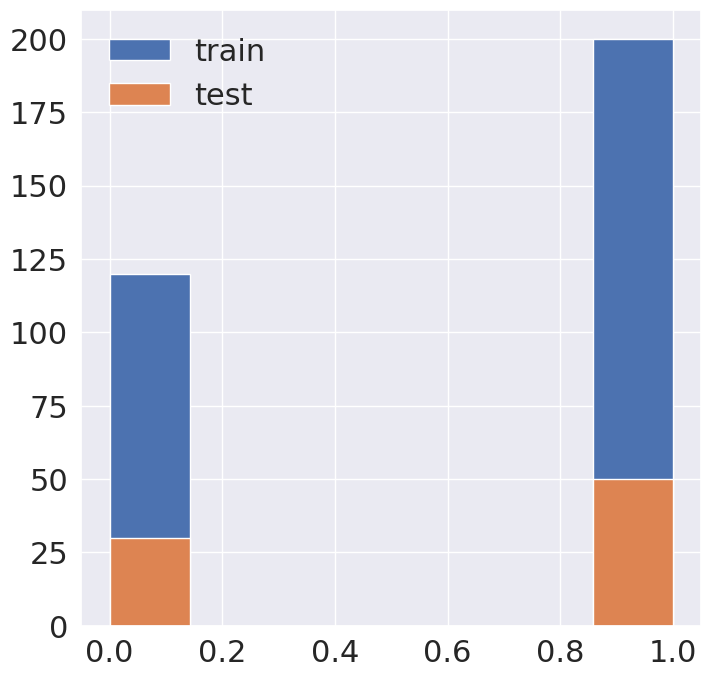

In [11]:
y_train.hist(bins=7, figsize=(8,8), label='train');
y_test.hist(bins=7, figsize=(8,8), label='test');
plt.legend();
sauvegarderImage("La separation des données pour l'apprentissage")

# Le déclaration des classifieurs 

In [12]:
names = [
            'Random_Forest',
            'AdaBoost',
            'XGBoost',
            'LogisticRegression',
            'Nearest_Neighbors',
            'GaussianNaiveBayes',
            'Neural_Net'
        ]

classifiers = [
            RandomForestClassifier(
                max_depth=6,
                max_features=3,
                min_samples_split=4,
                n_estimators=12,
                n_jobs=-1
            ),
            AdaBoostClassifier(n_estimators=52),    
            XGBClassifier(
                objective='binary:logistic',
                eval_metric='auc',
                n_estimators=12,
                max_depth=6,
                use_label_encoder=False
            ),
            LogisticRegression(
                C=0.81113,
                max_iter=8000,
                penalty='l2',
                solver='lbfgs',
                n_jobs=-1
            ),
            KNeighborsClassifier(
                algorithm='ball_tree',
                n_neighbors=24,
                p=1,
                weights='distance',
                n_jobs=-1
            ),
            GaussianNB(),
            MLPClassifier(alpha=1),
        ]

dictModels = {name:clf for name, clf in zip(names, classifiers)}

In [13]:
dictModels

{'Random_Forest': RandomForestClassifier(max_depth=6, max_features=3, min_samples_split=4,
                        n_estimators=12, n_jobs=-1),
 'AdaBoost': AdaBoostClassifier(n_estimators=52),
 'XGBoost': XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, device=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric='auc', feature_types=None,
               gamma=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=6, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=12, n_jobs=None,
               num_parallel_tree=None, random_state=None, ...),
 'LogisticRegression': Logist

# Le choix des classifieurs 

In [14]:
def choixClassifieurs(X_train, y_train,X_test, y_test, dictModels):
    np.random.seed(123456)
    t0 = time.time()  
    # h = .02  # step size in the mesh
    lw = 1

    plt.figure(figsize=(18,36))
    if int(str(sns.__version__).split('.')[1]) > 8 : 
        plt.style.use('seaborn-v0_8-darkgrid')
    else:
        plt.style.use('seaborn-darkgrid')
    couleurs = sns.hls_palette(len(dictModels.keys()), l=.4, s=.9)
    r_acc,r_aucROC = dict(),dict()
    fauxPositifs, vraisPositifs, probabilites = dict(),dict(),dict()
    accuracy,logloss,hammingloss,precision,sensibilite,f1,jaccard = dict(),dict(),dict(),dict(),dict(),dict(),dict()
    prec, rec, tauxPR, avgPrecRec =  dict(),dict(),dict(),dict()

    for i, nom in enumerate(dictModels):    
        t1 = time.time()  
        dictModels[nom].fit(X_train, y_train)

        y_probas = dictModels[nom].predict_proba(X_test)
        y_pred = dictModels[nom].predict(X_test)
        fauxPositifs[nom], vraisPositifs[nom], probabilites[nom] = roc_curve(y_test.ravel(), y_probas[:, 1])

        r_aucROC[nom]     = auc(fauxPositifs[nom], vraisPositifs[nom])
        accuracy[nom]     = accuracy_score(y_test,y_pred)
        logloss[nom]      = log_loss(y_test,y_pred)
        hammingloss[nom]  = hamming_loss(y_test,y_pred)
        precision[nom]    = precision_score(y_test,y_pred)
        sensibilite[nom]  = recall_score(y_test,y_pred)
        f1[nom]           = f1_score(y_test,y_pred)
        jaccard[nom]      = jaccard_score(y_test,y_pred)


        prec[nom], rec[nom], tauxPR[nom] = precision_recall_curve(y_test.ravel(), y_probas[:, 1])
        avgPrecRec[nom] = average_precision_score(y_test.ravel(), y_probas[:, 1])

        print(f'{nom:21s}'+(' %.4f' % accuracy[nom]).lstrip('0'),end='\t--\t')
        print ("Area under the ROC curve : %0.4f" % r_aucROC[nom],end='\t--\t')
        print('Exécution  :'+('%.2fs' % (time.time() - t1)).lstrip('0'))

        plt.subplot(2, 1, 1)
        plt.plot(fauxPositifs[nom], vraisPositifs[nom], color=couleurs[i], label=nom + '(AUC = %0.4f)' % r_aucROC[nom])

        plt.subplot(2, 1, 2)
        plt.step(rec[nom], prec[nom], where='post', color=couleurs[i], label=f"{nom}(AP = {avgPrecRec[nom]:0.8f})")#alpha=0.8, 
        plt.fill_between(rec[nom], prec[nom], step='post', alpha=0.05)



    plt.subplot(2, 1, 1)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('Le taux de faux Positifs-(1 - Spécificité) = VN / (FP + VN)',size=18)
    plt.ylabel('Le taux de vrais positifs-Sensibilité = VP / (VP + FN)',size=18)
    plt.title('La courbe ROC (Receiver Operating Caracteristic)',size=20)
    plt.legend(loc="lower right")    

    plt.subplot(2, 1, 2)
    f_scores = np.linspace(0.2, 0.9, num=7)
    for f_score in f_scores:
        x = np.linspace(0.01, 1)
        y = f_score * x / (2 * x - f_score)
        l, = plt.plot(x[y >= 0], y[y >= 0], color='gray', alpha=0.2)
        plt.annotate('f1={0:0.1f}'.format(f_score), xy=(0.9, y[45] + 0.02))

    # plt.subplot(2, 1, 2)                
    # plt.plot([0, 1], [0.5, 0.5], 'k--')
    plt.plot([0, 1], [0, 1], 'k--', lw=lw)
    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('Sensibilité(Rappel) = VP / (VP + FN)', size=18)
    plt.ylabel('Précision = VP / (VP + FP)', size=18)      
    plt.title('La courbe Précision-Rappel',size=20)
    plt.legend(loc="lower left")    

    sauvegarderImage("Les courbes ROC et Précision-Rappel")    
    plt.show()

    print('Exécution  :'+('%.2fs' % (time.time() - t0)).lstrip('0'))

    resultat = pd.DataFrame(pd.Series(r_aucROC), columns=["aucROC"])
    resultat['avgPrecRec']     = pd.Series(avgPrecRec   )
    resultat['accuracy']     = pd.Series(accuracy   )
    resultat['f1']           = pd.Series(f1         )
    resultat['precision']    = pd.Series(precision  )
    resultat['sensibilite']  = pd.Series(sensibilite)
    resultat['logloss']      = pd.Series(logloss    )
    resultat['hammingloss']  = pd.Series(hammingloss)
    resultat['jaccard']      = pd.Series(jaccard    )

    resultat.sort_values('f1',ascending=False, inplace=True)
    return resultat

Random_Forest         1.0000	--	Area under the ROC curve : 1.0000	--	Exécution  :.06s
AdaBoost              1.0000	--	Area under the ROC curve : 1.0000	--	Exécution  :.05s
XGBoost               1.0000	--	Area under the ROC curve : 1.0000	--	Exécution  :2.75s
LogisticRegression    1.0000	--	Area under the ROC curve : 1.0000	--	Exécution  :.47s
Nearest_Neighbors     0.8125	--	Area under the ROC curve : 0.8560	--	Exécution  :.04s
GaussianNaiveBayes    0.9125	--	Area under the ROC curve : 0.9933	--	Exécution  :.01s
Neural_Net            0.8250	--	Area under the ROC curve : 0.9580	--	Exécution  :.08s


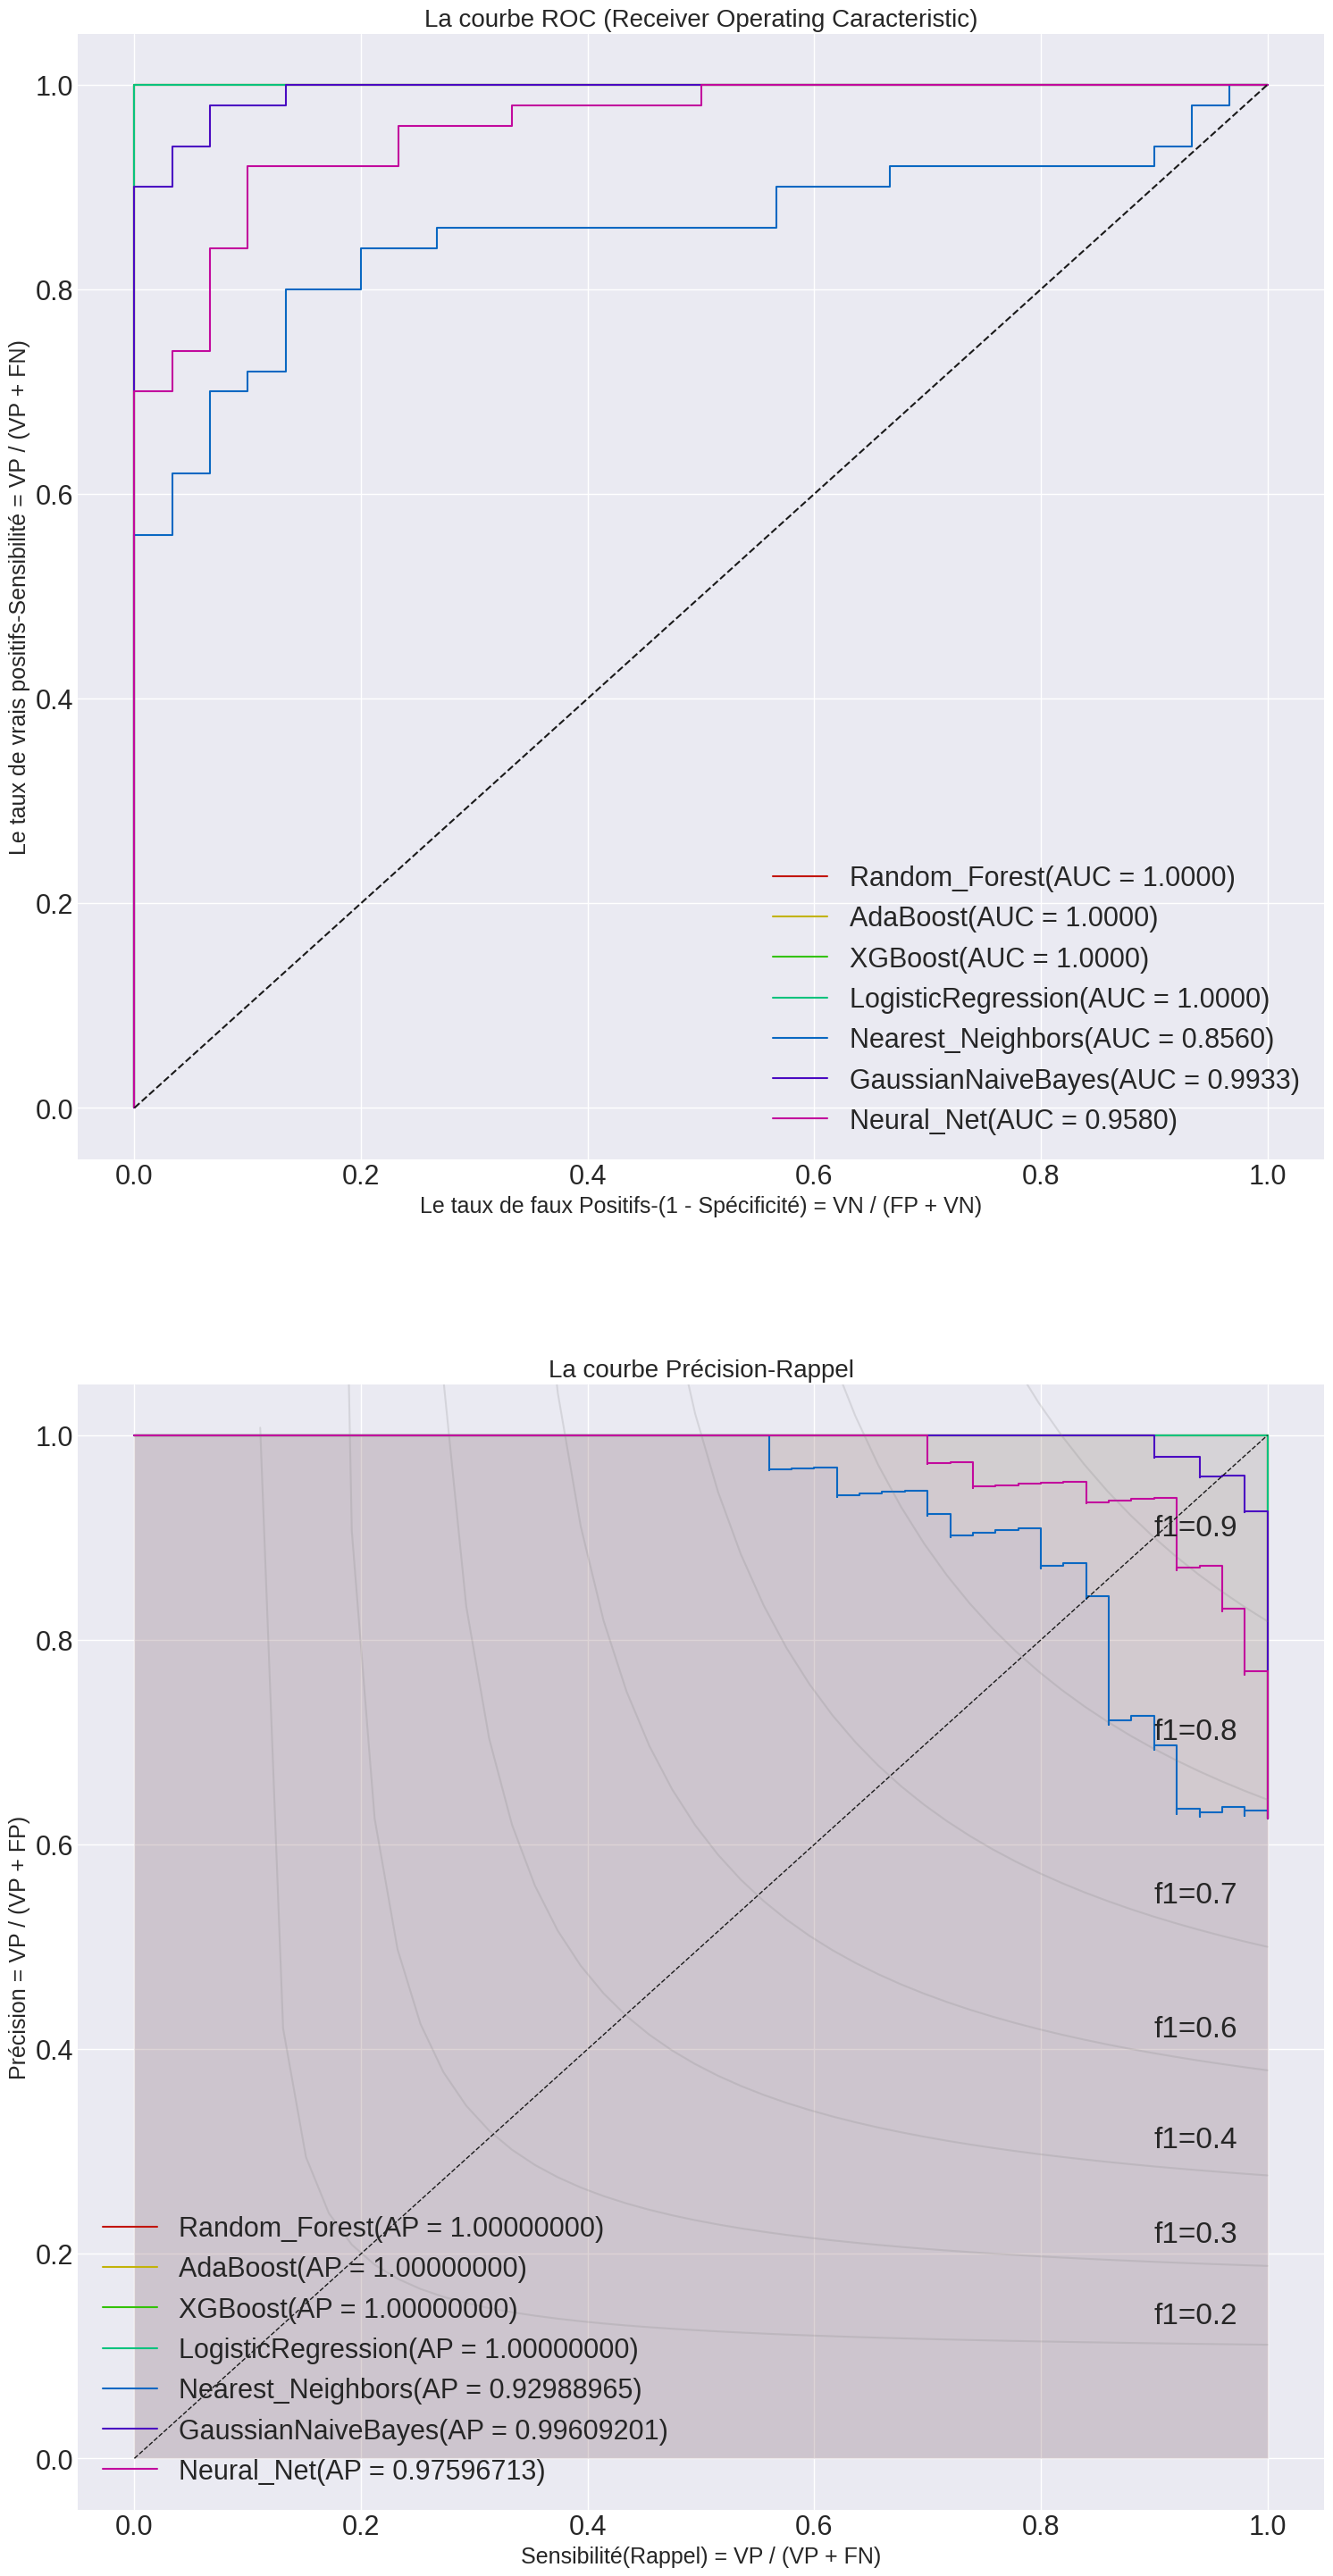

Exécution  :8.95s


In [15]:
resultatsBase = choixClassifieurs(X_train, y_train,X_test, y_test, dictModels)

In [16]:
resultatsBase['execution']='resultatsBase'
resultatsBase

,aucROC,avgPrecRec,accuracy,f1,precision,sensibilite,logloss,hammingloss,jaccard,execution
Random_Forest,1.000000,1.000000,1.0000,1.000000,1.000000,1.00,2.220446e-16,0.0000,1.000000,resultatsBase
AdaBoost,1.000000,1.000000,1.0000,1.000000,1.000000,1.00,2.220446e-16,0.0000,1.000000,resultatsBase
XGBoost,1.000000,1.000000,1.0000,1.000000,1.000000,1.00,2.220446e-16,0.0000,1.000000,resultatsBase
LogisticRegression,1.000000,1.000000,1.0000,1.000000,1.000000,1.00,2.220446e-16,0.0000,1.000000,resultatsBase
GaussianNaiveBayes,0.993333,0.996092,0.9125,0.924731,1.000000,0.86,3.153820e+00,0.0875,0.860000,resultatsBase
Neural_Net,0.958000,0.975967,0.8250,0.844444,0.950000,0.76,6.307639e+00,0.1750,0.730769,resultatsBase
Nearest_Neighbors,0.856000,0.929890,0.8125,0.838710,0.906977,0.78,6.758185e+00,0.1875,0.722222,resultatsBase
